<hr><h1>ACTIVITY 3 : PR3 PH DENGUE ANALYSIS </h1><hr>

<h3>Analyst : Lusanta , Louie John V.</h3>

<h3>IMPORT NECESSARY LIBRARIES</h3>

In [1]:
# pip install scipy

In [2]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

<h3>CONVERT DATASET TO DATAFRAME</h3>

In [3]:
dengue = pd.read_csv("C:\\Users\\Leenitte\\Downloads\\dengue.csv")
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h3>CHECK DATAFRAME AND INFORMATION</h3>

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h3>CHECK BASIC DESCRIPTIVE STATISTICS</h3>

In [5]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


<h3>CALL EACH COLUMN INDIVIDUALLY</h3>

In [6]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [7]:
dengue['Month']

0         January
1        February
2           March
3           April
4             May
          ...    
1015       August
1016    September
1017      October
1018     November
1019     December
Name: Month, Length: 1020, dtype: object

In [8]:
dengue['Year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1015    2020
1016    2020
1017    2020
1018    2020
1019    2020
Name: Year, Length: 1020, dtype: int64

In [9]:
dengue['Region']

0       Region I
1       Region I
2       Region I
3       Region I
4       Region I
          ...   
1015       BARMM
1016       BARMM
1017       BARMM
1018       BARMM
1019       BARMM
Name: Region, Length: 1020, dtype: object

In [10]:
dengue['Dengue_Cases']

0       705
1       374
2       276
3       240
4       243
       ... 
1015     91
1016     16
1017     13
1018     15
1019     23
Name: Dengue_Cases, Length: 1020, dtype: int64

In [11]:
dengue['Dengue_Deaths']

0       1
1       0
2       0
3       2
4       1
       ..
1015    0
1016    8
1017    9
1018    1
1019    0
Name: Dengue_Deaths, Length: 1020, dtype: int64

<h3>CHECK FOR NULL VALUES</h3>

In [12]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h3>CHECK COLUMN DATA TYPES</h3>

In [13]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [14]:
dengue['Month'] = dengue ['Month'].astype('category')
dengue['Region'] = dengue ['Region'].astype('category')



In [15]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


<h3>DENGUE CASES TREND FROM 2016 - 2020</h3>

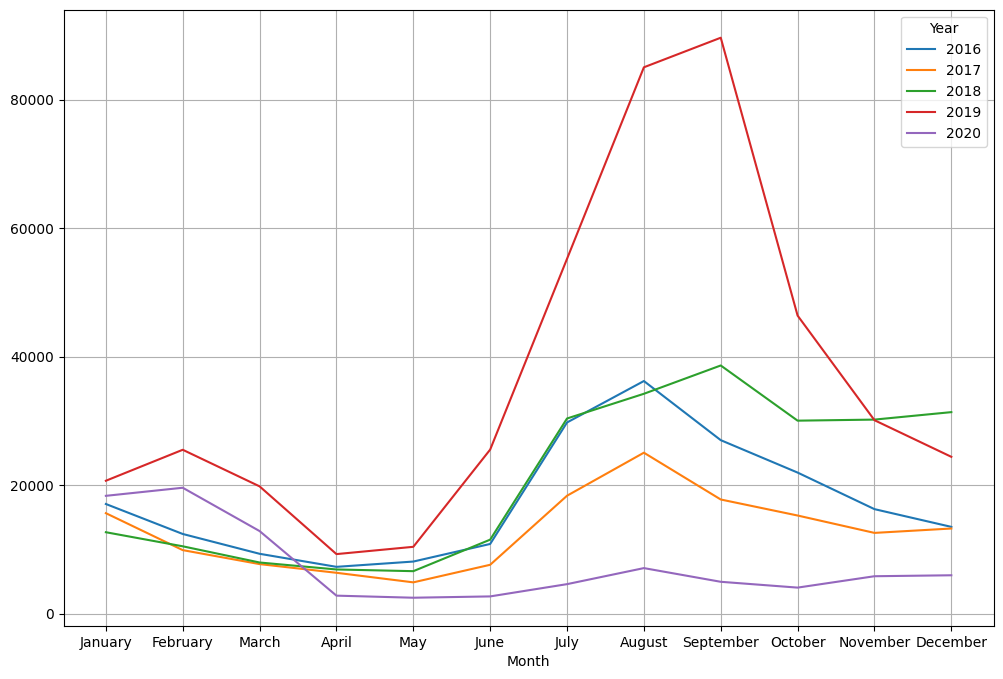

In [16]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h3>LINE PLOT WITH SEABORN</h3>

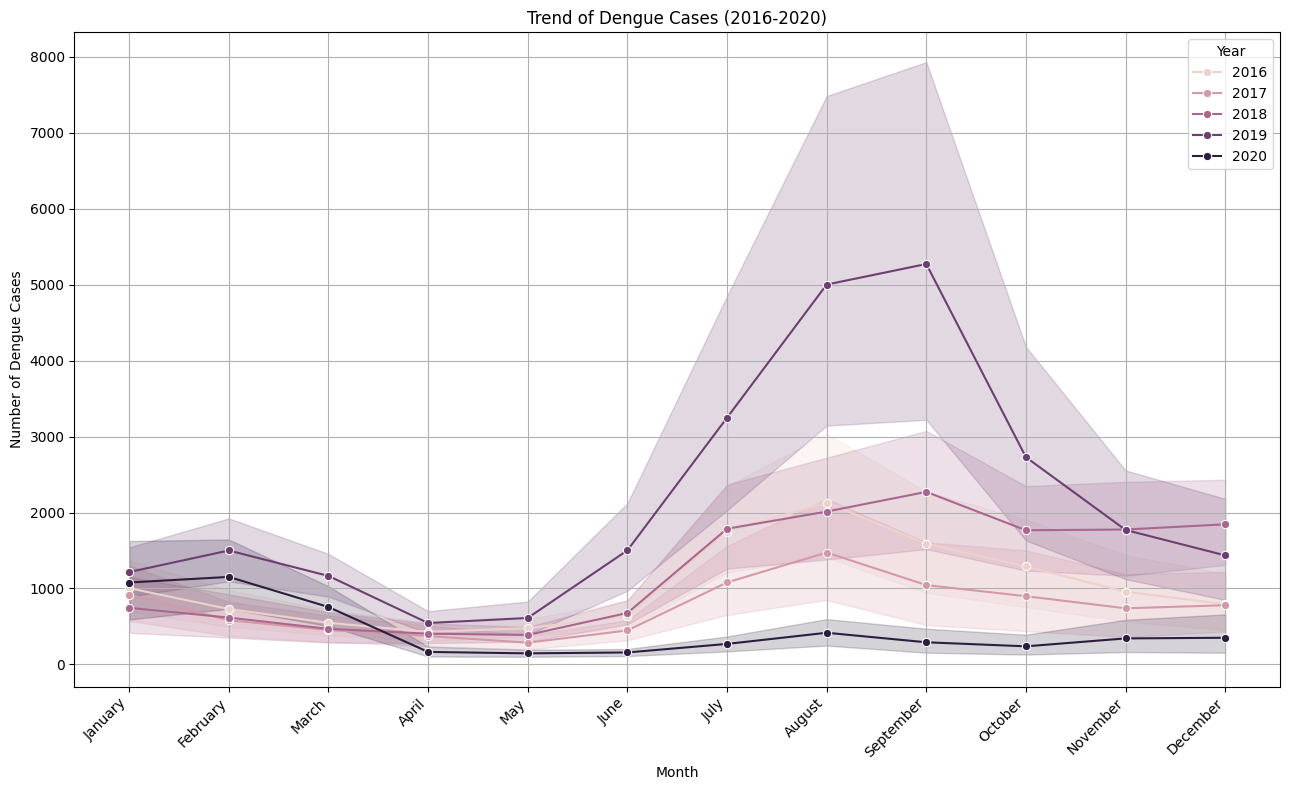

In [17]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

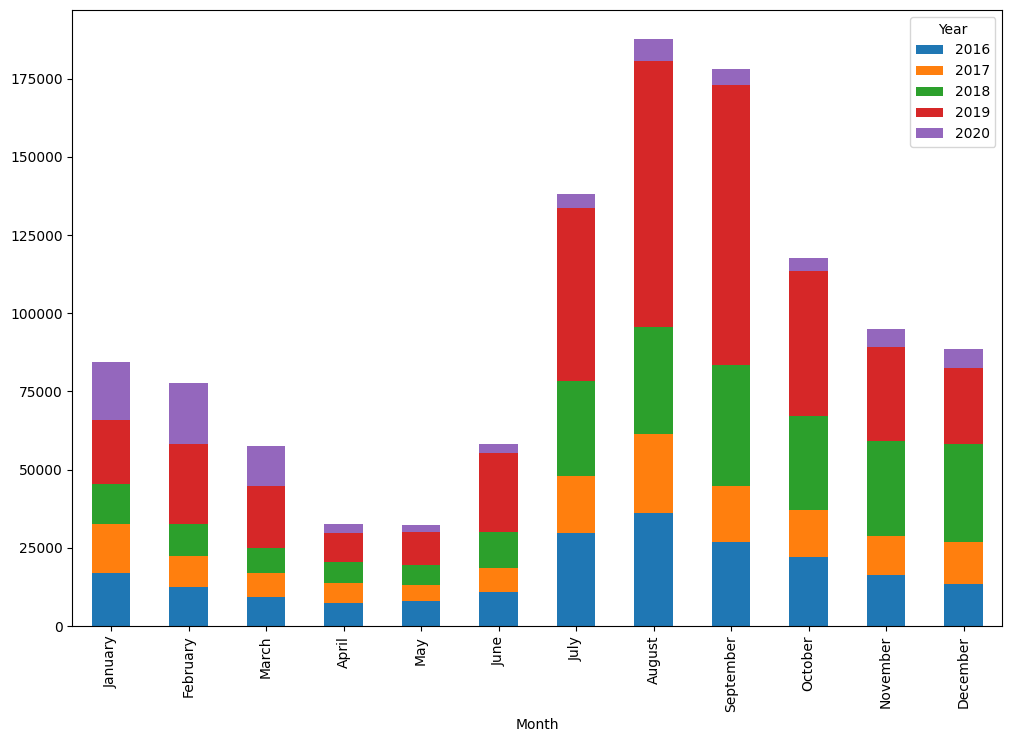

In [18]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

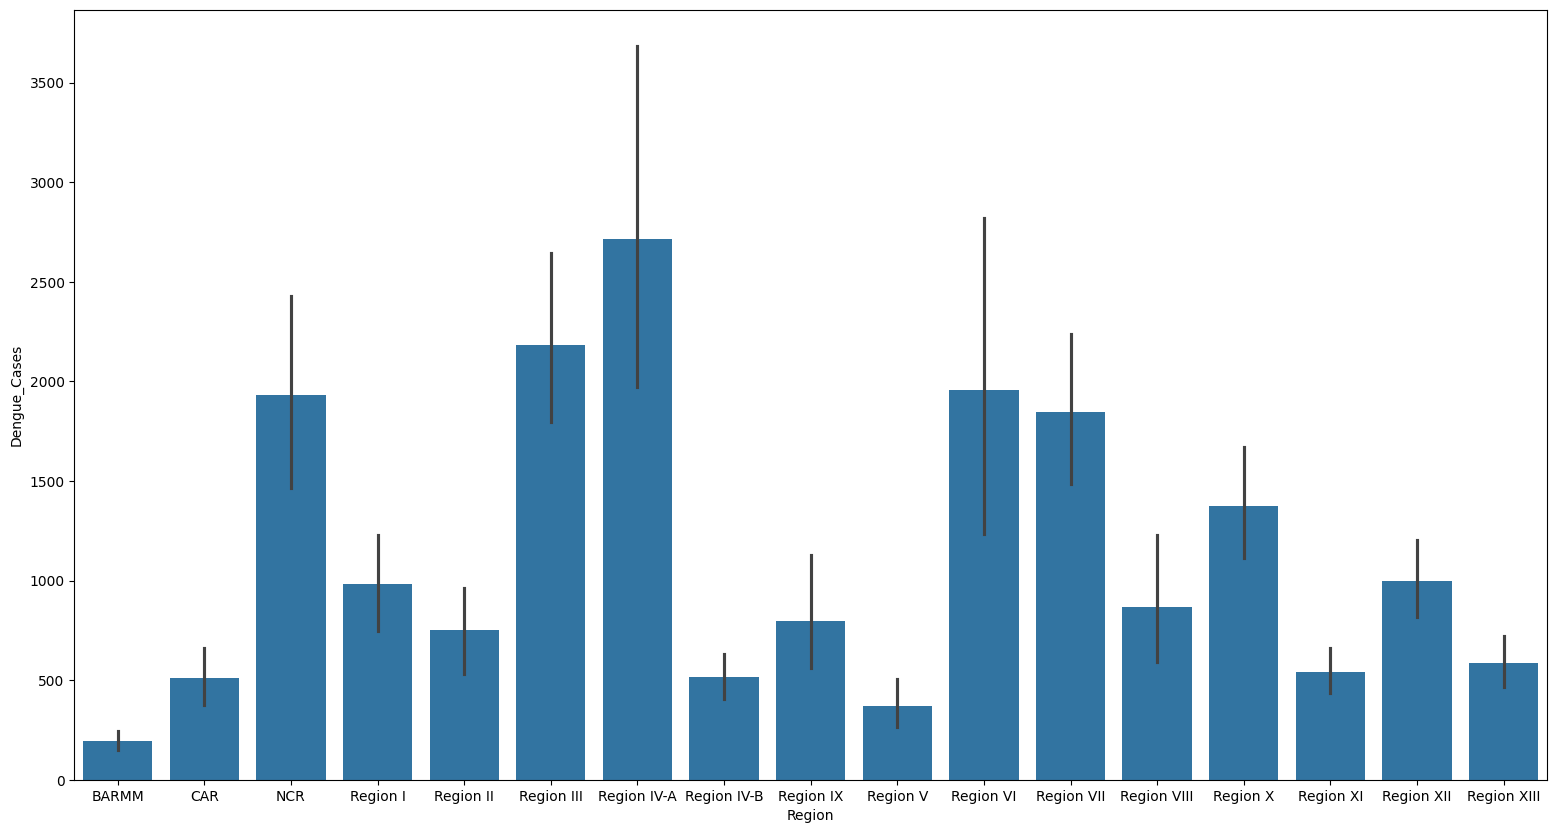

In [19]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

In [20]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [21]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


<hr><h1>EXPLORATORY DATA ANALYSIS</h1><HR>

In [22]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


In [23]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


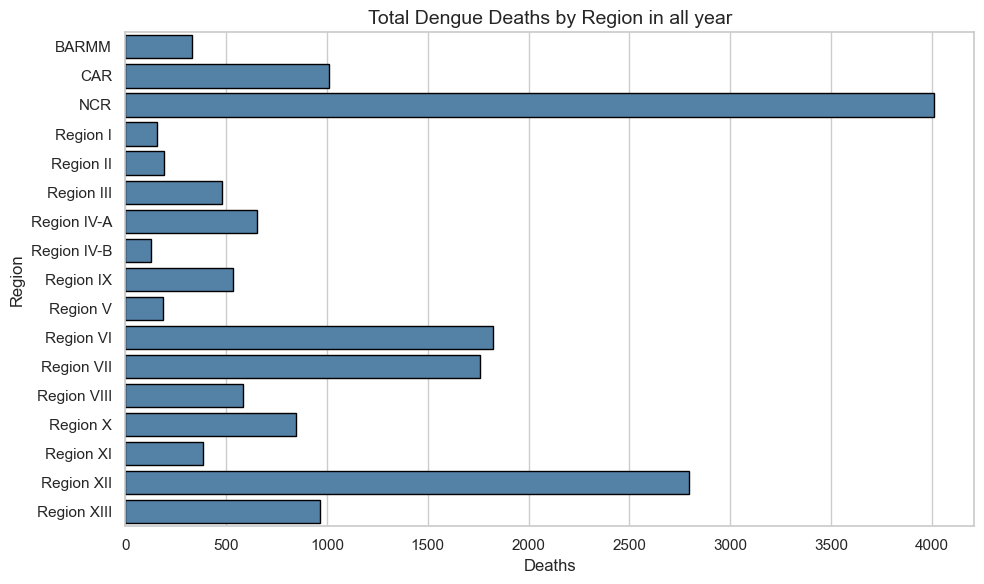

In [47]:
regional_total = dengue.groupby("Region")["Dengue_Deaths"].sum()
plt.figure(figsize=(10, 6))
sns.barplot(y=regional_total.index, x=regional_total.values, color="steelblue", edgecolor="black")
plt.title("Total Dengue Deaths by Region in all year", fontsize=14)
plt.xlabel("Deaths")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h4><b><i>Insight 1:</b></i><hr><br> NCR has the most dengue deaths, over 4,000. Region XII is second with nearly 3,000 deaths. Region I and II have the fewest, under 500. Dengue deaths are highest in the NCR and Region XII. This suggests that more populated and urbanized regions tend to experience higher dengue-related deaths compared to less populated ones.</h4>

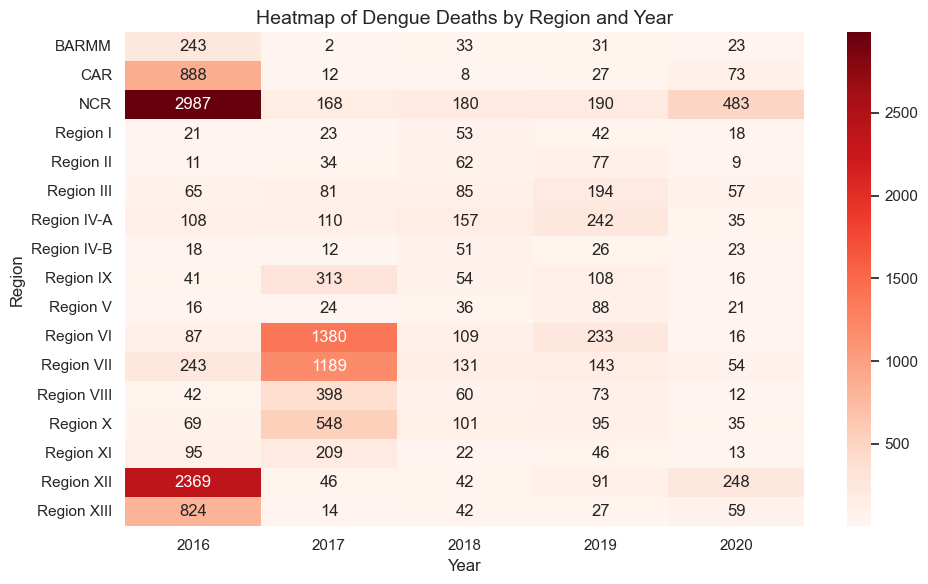

In [45]:
heatmap_data = dengue.groupby(["Region", "Year"])["Dengue_Deaths"].sum().unstack().fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".0f")
plt.title("Heatmap of Dengue Deaths by Region and Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


<h4><b><i>Insight 2:</b></i><hr><br> The year 2016 had the highest death counts overall for many regions, especially the NCR (2,987 deaths) and Region XII (2,369 deaths). This shows 2016 was a very bad year for dengue deaths in those two regions. The high number in the NCR is much larger than any other death count shown in any year.</h4>

<h4><b><i>Insight 3:</b></i><hr><br> While many regions saw lower death numbers after 2016, there was a noticeable spike in Region VI and Region VII in 2017, recording 1,380 and 1,189 deaths, respectively. This suggests that the center of the dengue outbreak shifted to these Visayan regions in 2017. Most regions showed a significant decrease in deaths by 2020.</h4>
    
<h4><b><i>Insight 4:</b></i><hr><br> The NCR saw a big rise in deaths in 2020 with 483 cases, which is much higher than the three years before it. This suggests the NCR had trouble controlling dengue recently. Meanwhile, most other regions had their lowest death numbers in 2020.</h4>

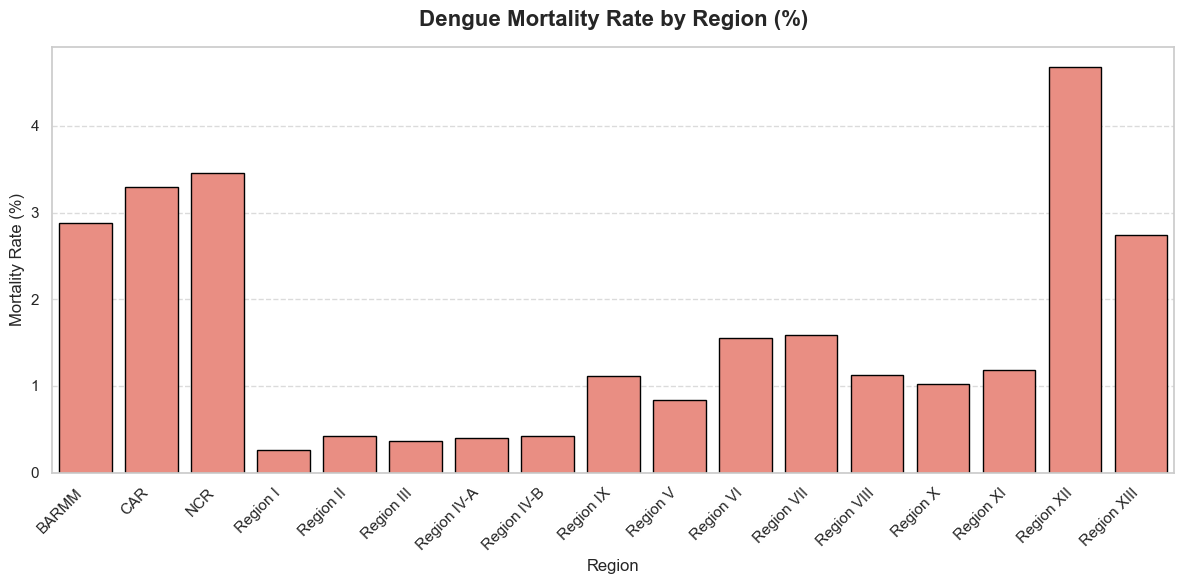

In [56]:
mortality = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
mortality["Mortality_Rate"] = (mortality["Dengue_Deaths"] / mortality["Dengue_Cases"]) * 100
sns.set(style="whitegrid", palette="Reds")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=mortality,
    x="Region",
    y="Mortality_Rate",
    color="salmon",
    edgecolor="black"
)

# Beautify chart
plt.title("Dengue Mortality Rate by Region (%)", fontsize=16, weight="bold", pad=15)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Mortality Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


    
<h4><b><i>Insight 5:</b></i><hr><br> While the National Capital Region (NCR) has the highest total number of dengue deaths (4,008) and the most cases (115,966), it is Region XII that faces the most critical challenge with the highest Mortality Rate at $4.68%$. In contrast, Region I demonstrates the best outcome, with the lowest mortality rate at just $0.27%$.</h4>

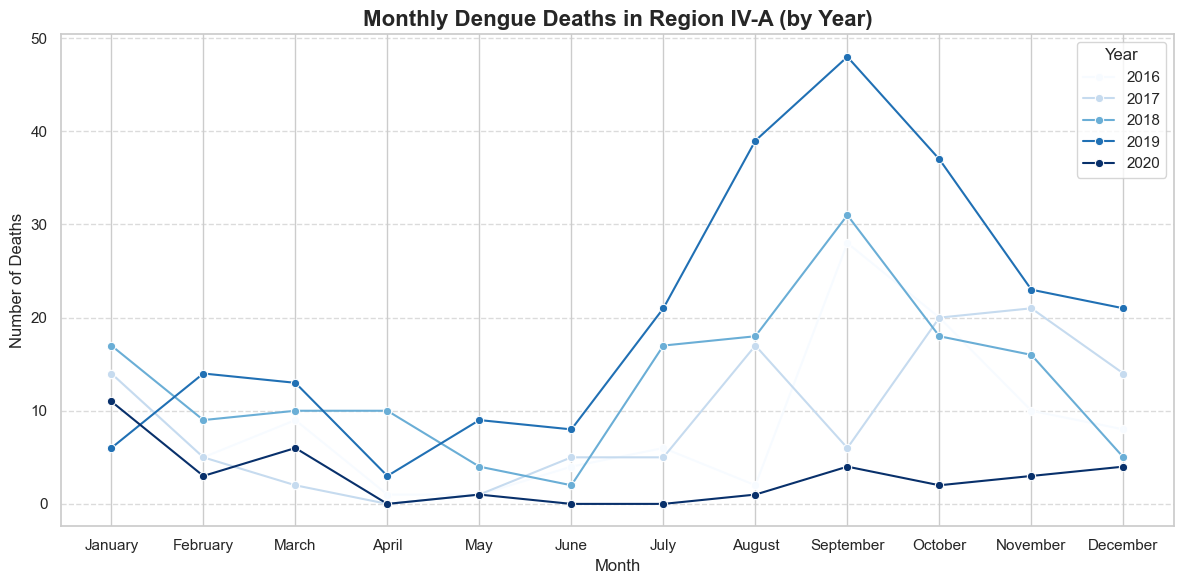

In [64]:
region_4a = dengue[dengue["Region"] == "Region IV-A"]
monthly_4a = region_4a.groupby(["Year", "Month"])["Dengue_Deaths"].sum().reset_index()
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_4a["Month"] = pd.Categorical(monthly_4a["Month"], categories=month_order, ordered=True)
monthly_4a = monthly_4a.sort_values(["Year", "Month"])
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.lineplot(
    data=monthly_4a,
    x="Month",
    y="Dengue_Deaths",
    hue="Year",
    marker="o",
    palette="Blues"
)

# Beautify
plt.title("Monthly Dengue Deaths in Region IV-A (by Year)", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<h4><b><i>Insight 5:</b></i><hr><br> Dengue deaths in Region IV-A consistently peak during the later months of the year, usually around September and October. This strong seasonal pattern likely corresponds to the rainy season, when mosquito populations increase.</h4>
    
<h4><b><i>Insight 6:</b></i><hr><br> The year 2019 stands out significantly from all others, showing a massive spike in deaths that reached nearly 50 in September. This indicates that 2019 experienced a major dengue epidemic in Region IV-A compared to the relatively low numbers in the other four years.
</h4>
    
<h4><b><i>Insight 7:</b></i><hr><br> In both 2018 and 2020, the total number of monthly dengue deaths remained very low, mostly staying below 10 for the entire year. This suggests that public health measures or environmental factors kept the dengue impact minimal in those specific years.
</h4>

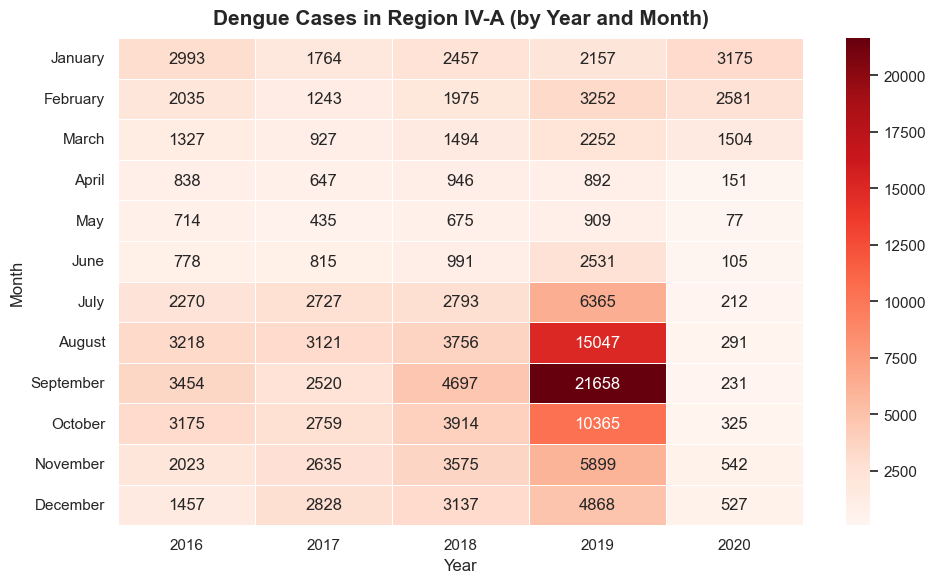

In [72]:
region_4a = dengue[dengue["Region"] == "Region IV-A"]
heatmap_data = region_4a.groupby(["Year", "Month"])["Dengue_Cases"].sum().reset_index()
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
heatmap_data["Month"] = pd.Categorical(heatmap_data["Month"], categories=month_order, ordered=True)
heatmap_pivot = heatmap_data.pivot(index="Month", columns="Year", values="Dengue_Cases")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_pivot, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Dengue Cases in Region IV-A (by Year and Month)", fontsize=15, weight="bold", pad=10)
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

<h4><b><i>Insight 8:</b></i><hr><br> The year 2019 saw an extraordinary surge in dengue cases, with a peak of 21,658 cases in September. This number is dramatically higher than any other month across all five years, clearly marking 2019 as a severe epidemic year.</h4>
    
<h4><b><i>Insight 9:</b></i><hr><br> In most years, dengue cases consistently rise in the latter half of the year, usually peaking between July and October. This strong pattern aligns with the rainy season, suggesting that weather is a major factor in the spread of the disease.
</h4>
    
<h4><b><i>Insight 10:</b></i><hr><br>In contrast to the previous years, 2020 recorded the lowest number of cases across almost every single month. This suggests that the dengue spread was minimal in 2020, likely due to public health success or major behavior changes.
</h4>